In [1]:
import os
import os.path
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as pyplot


In [2]:
total=pd.read_csv("data/total.csv")
grouped=total.groupby(["Tillage_st_x", "Year"]).agg({"Yield_bu_ac":"mean", "input_cost":"mean", "profit":"mean", "roi":"mean", "income_per_ac":"mean"})

In [3]:
grouped

Yield_bu_ac  input_cost      profit           roi  \
Tillage_st_x Year                                                      
Alt          1970    34.800000    2.722098   43.561902   1600.306443   
             1971    37.025000    2.702201   37.284799   1379.793909   
             1972    47.000000   32.002656   41.787344    130.574616   
             1973    10.325000    2.564469   23.764281    926.674664   
             1974    35.900000    2.656079  105.761921   3981.881203   
...                        ...         ...         ...           ...   
No_till      2010    61.908210    4.180372  316.504158   7571.196743   
             2011    46.747500    4.120550  286.648900   6956.568121   
             2012    61.458863    4.159390  419.292173  10080.618007   
             2013    26.580498    4.151924  114.397100   2755.279508   
             2014   102.358005    4.072859  374.651759   9198.741106   

                   income_per_ac  
Tillage_st_x Year                 
Alt          1970      46.284000  
             1971      39.987000  
             1972      73.790000  
             1973      26.328750  
             1974     108.418000  
...                          ...  
No_till      2010     320.684529  
             2011     290.769450  
             2012     423.451563  
             2013     118.549023  
             2014     378.724619  

[180 rows x 5 columns]

In [4]:
import numpy as np

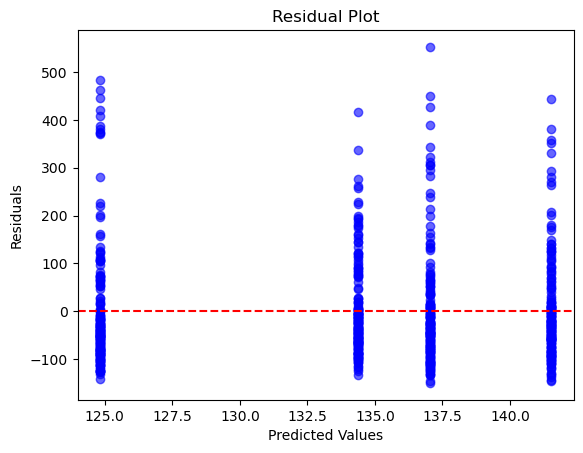

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6402
Date:                Wed, 11 Dec 2024   Prob (F-statistic):              0.589
Time:                        16:47:32   Log-Likelihood:                -4230.4
No. Observations:                 686   AIC:                             8469.
Df Residuals:                     682   BIC:                             8487.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [5]:

model=smf.ols(formula="profit ~ C(Tillage_st_x)", data=total).fit()

residuals = model.resid
predicted_values = model.fittedvalues
pyplot.scatter(predicted_values, residuals, alpha=0.6, color='b')
pyplot.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 (ideal for residuals)
pyplot.title('Residual Plot')
pyplot.ylabel('Residuals')
pyplot.xlabel('Predicted Values')
pyplot.show()
print(model.summary())

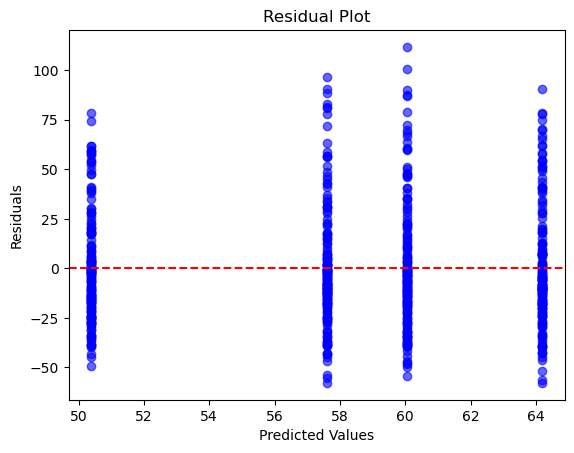

                            OLS Regression Results                            
Dep. Variable:            Yield_bu_ac   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     6.252
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           0.000344
Time:                        16:47:32   Log-Likelihood:                -3310.9
No. Observations:                 686   AIC:                             6630.
Df Residuals:                     682   BIC:                             6648.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [6]:
model = smf.ols("Yield_bu_ac ~ C(Tillage_st_x)", total).fit()

residuals = model.resid
predicted_values = model.fittedvalues
pyplot.scatter(predicted_values, residuals, alpha=0.6, color='b')
pyplot.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 (ideal for residuals)
pyplot.title('Residual Plot')
pyplot.ylabel('Residuals')
pyplot.xlabel('Predicted Values')
pyplot.show()
print(model.summary())

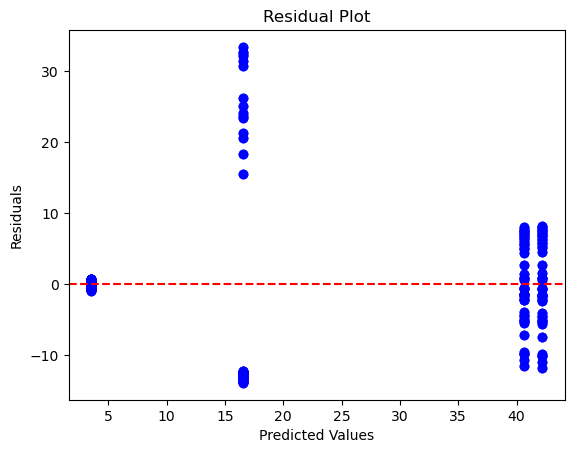

                            OLS Regression Results                            
Dep. Variable:             input_cost   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     614.1
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          1.87e-197
Time:                        16:47:33   Log-Likelihood:                -2694.1
No. Observations:                 720   AIC:                             5396.
Df Residuals:                     716   BIC:                             5415.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [7]:
model = smf.ols("input_cost ~ C(Tillage_st_x)", total).fit()

residuals = model.resid
predicted_values = model.fittedvalues
pyplot.scatter(predicted_values, residuals, alpha=0.6, color='b')
pyplot.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0 (ideal for residuals)
pyplot.title('Residual Plot')
pyplot.ylabel('Residuals')
pyplot.xlabel('Predicted Values')
pyplot.show()
print(model.summary())

In [8]:
import scipy.stats as stats

no_till = total[total['Tillage_st_x'] == "No_till"].copy()
no_till.dropna(inplace=True)
alt = total[total['Tillage_st_x'] == "Alt"].copy()
alt.dropna(inplace=True)
chisel = total[total['Tillage_st_x'] == "Chisel"].copy()
chisel.dropna(inplace=True)
conv = total[total['Tillage_st_x'] == "Conv"].copy()
conv.dropna(inplace=True)

In [9]:
def conv_v_none(variable):
    '''
    runs a t-test on the input variable between no till and conventional till
    '''
    t_stat, p_value = stats.ttest_ind(no_till[variable], conv[variable], nan_policy="omit")
    nt=no_till[variable].mean()
    ct=conv[variable].mean()
    
    print("mean no till for ", variable, ": ", nt)
    print("mean conv till for ", variable, ": ", ct)
    print("T-statistic for ", variable, ": ", t_stat)
    print("P-value for ", variable, ": ", p_value)
    return


In [10]:
conv_v_none("profit")

mean no till for  profit :  134.3864694024841
mean conv till for  profit :  124.82292044906674
T-statistic for  profit :  0.7685812371152062
P-value for  profit :  0.4426754674791201


In [11]:
conv_v_none("Yield_bu_ac")

mean no till for  Yield_bu_ac :  50.38788164117647
mean conv till for  Yield_bu_ac :  60.05272209709302
T-statistic for  Yield_bu_ac :  -2.964726848864808
P-value for  Yield_bu_ac :  0.003243466104802426


In [12]:
conv_v_none("input_cost")

mean no till for  input_cost :  3.5136186986923725
mean conv till for  input_cost :  42.14670275258443
T-statistic for  input_cost :  -85.2176991889578
P-value for  input_cost :  1.7333650271003115e-231


In [13]:

f_statistic, p_value = stats.f_oneway(no_till["profit"], conv["profit"],chisel["profit"], alt["profit"])

# Print results
print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 0.6402117646043431
P-value: 0.589315391872417


In [31]:
income_table=pd.pivot_table(total, values="income_per_ac", index="Year", columns="Tillage_st_x", aggfunc="mean")
expense_table=pd.pivot_table(total, values="input_cost", index="Year", columns="Tillage_st_x", aggfunc="mean")

income_table["difference"]=income_table["Conv"]-income_table["No_till"]
expense_table["difference"]=expense_table["Conv"]-expense_table["No_till"]

income_diff=income_table["difference"].mean()
expense_diff=expense_table["difference"].mean()

In [32]:
income_diff=income_table["difference"].mean()
expense_diff=expense_table["difference"].mean()

In [33]:
income_diff #how much more did conventional till make

30.190757055139542

In [34]:
expense_diff #how much more did conventional till cost

38.671231638948775

In [35]:
income_diff-expense_diff #how much more did conventional till profit

-8.480474583809233